In [1]:
import numpy as np
import pandas as pd

In [13]:
x_bat = pd.read_csv("stacked_batting_features.csv")
x_bat.head()

,player_id,0,1,2,3,4,5,6,7,8,9
0,ordazlu01,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0
1,distebe01,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,schmimi01,6.2,7.9,8.8,7.7,7.4,6.8,7.0,5.0,6.1,6.1
3,thomeji01,5.5,3.3,4.5,4.7,5.6,7.4,4.7,3.2,0.2,4.9
4,diazma02,1.7,0.6,-0.9,-0.8,-0.1,0.0,0.0,0.0,0.0,0.0


In [77]:
y_bat = pd.read_csv("batting_yarr.csv")
y_bat7 = y_bat['0'] # start by looking at just data from year 7
y_bat7.head()

[0.0,
 0.0,
 6.2000000000000002,
 5.5,
 1.7,
 -0.10000000000000001,
 0.5,
 1.2,
 -1.1000000000000001,
 2.2999999999999998,
 0.80000000000000004,
 -0.69999999999999996,
 0.0,
 0.90000000000000002,
 -2.2999999999999998,
 0.69999999999999996,
 -0.40000000000000002,
 -0.40000000000000002,
 0.10000000000000001,
 4.0999999999999996,
 1.7,
 -0.5,
 1.0,
 2.0,
 5.2999999999999998,
 0.10000000000000001,
 -0.5,
 2.5,
 2.2999999999999998,
 -0.69999999999999996,
 3.2999999999999998,
 -0.20000000000000001,
 -0.69999999999999996,
 1.6000000000000001,
 0.0,
 3.8999999999999999,
 0.20000000000000001,
 -0.10000000000000001,
 2.3999999999999999,
 0.10000000000000001,
 -0.5,
 -0.69999999999999996,
 -0.20000000000000001,
 2.1000000000000001,
 0.0,
 -0.10000000000000001,
 -0.5,
 0.10000000000000001,
 -0.29999999999999999,
 4.9000000000000004,
 1.6000000000000001,
 0.20000000000000001,
 0.0,
 -0.29999999999999999,
 3.7000000000000002,
 2.7000000000000002,
 1.8999999999999999,
 -0.10000000000000001,
 1.399999

In [93]:
features = x_bat.columns.tolist()
X = x_bat.as_matrix()
y = list(y_bat7)
# check if X order matches y
xplayers = X[:,0]
yplayers = y_bat['player_id']
mismatches = sum(xplayers != yplayers)
print('id mismatches: ' + str(mismatches) + ' of ' + str(len(xplayers)))
X = X[:,1:]

id mismatches: 0 of 1669


TypeError: unhashable type: 'slice'

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Scaler = MinMaxScaler()
Scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [163]:
X = Scaler.transform(X)
k = 40
Xr = SelectKBest(f_regression, k).fit_transform(X, y)
# should split data earlier but can't figure out how to save transform from selectkbest
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xr, y, test_size=0.20, random_state=54321)


In [164]:
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

MLP = MLPRegressor(activation='logistic', hidden_layer_sizes = (5), solver='lbfgs', alpha =1, random_state=54321)
param_grid = [0.00001, 0.00003, 0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3,
              1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
param_dict = {"alpha" : param_grid}
clf = GridSearchCV(MLP, param_dict, return_train_score=True, scoring='r2')
clf.fit(Xtrain, Ytrain)
clf.cv_results_
print(clf.best_params_)
clf.best_score_

{'alpha': 100}


0.28994228773739328

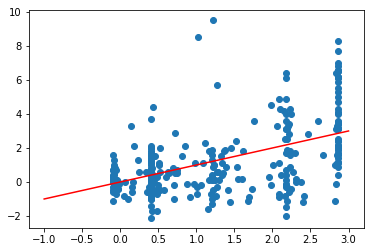

In [165]:
import matplotlib.pyplot as plt

Ypred = clf.predict(Xtest)
plt.scatter(Ypred, Ytest)
plt.plot([-1,3],[-1,3], 'r-')
plt.show()

0.28994228773739328